# Bank loans \- Model based on supervised learning

The bank managers want to explore ways of converting its liability customers to personal loan customers. A campaign that the bank ran last year for liability customers showed a conversion rate of over 9% success. The retail marketing department is devising  campaigns with better target marketing to increase the success ratio.

The bank data set contains information about its customers. It provides information about the education level of the clients, their professional experience and income, and the financial products they have.

- ID                            Customer ID
- Age                         Age
- Experience              Professional experience \(years\)
- Income                    Annual income \(thousands of dollars\)
- Family                     Total family members
- CCAvg                     Average spending on credit cards \(thousands of dollars\)
- Education                Education level: 1:undergraduate, 2:graduate, 3:postgraduate
- Mortgage                 House mortgage value \(thousands of dollars\)
- Securities Account  Has a security account: 1:yes, 0:no
- CD Account             Has a CD account: 1:yes, 0:no
- Online                      Has online banking facility:  1:yes, 0:no
- CreditCard               Has a credit card issued by the bank: 1:yes. 0:no
- Personal Loan         Target variable

In [1]:
import pandas as pd 
import numpy as np
import os
import csv
import random
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv("bank.csv")

# Check if it loaded correctly
print(df.head())


   ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define features and target variable
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Naïve Bayes": GaussianNB(),
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [4]:
# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    report = classification_report(y_test, y_pred)
    
    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc, "Report": report}

C:\Users\lgfit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:

# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    if result["AUC-ROC"] is not None:
        print(f"AUC-ROC: {result['AUC-ROC']:.4f}")
    print("Classification Report:\n", result["Report"])
    print("-" * 50)

Model: Naïve Bayes
Accuracy: 0.8790
AUC-ROC: 0.9225
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       904
           1       0.41      0.56      0.47        96

    accuracy                           0.88      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.90      0.88      0.89      1000

--------------------------------------------------
Model: Perceptron
Accuracy: 0.8540
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       904
           1       0.33      0.50      0.40        96

    accuracy                           0.85      1000
   macro avg       0.64      0.70      0.66      1000
weighted avg       0.88      0.85      0.87      1000

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9500
AUC-ROC: 0.9594
Classification Report:
               precision  

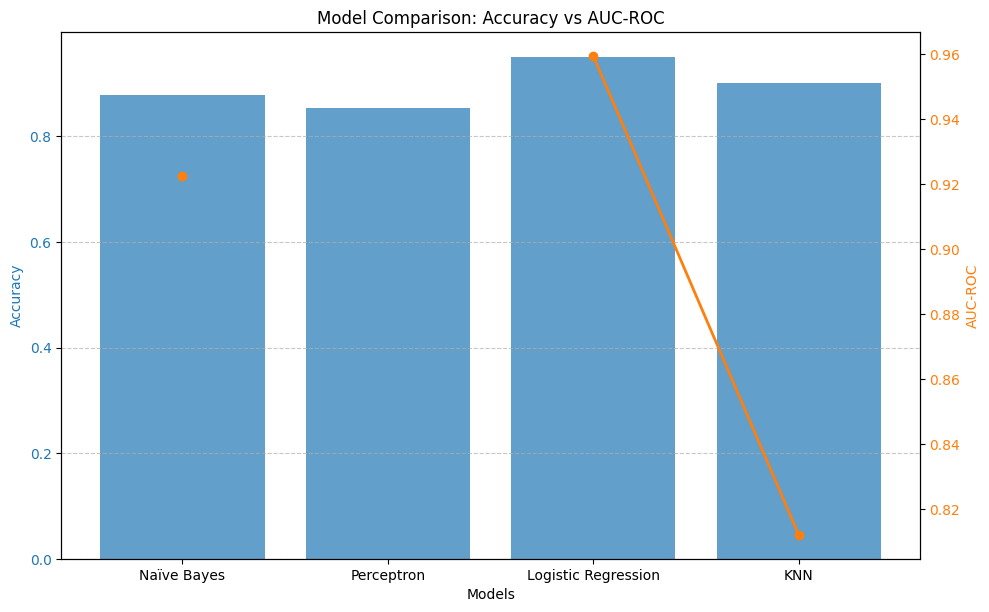

In [6]:
import matplotlib.pyplot as plt

# Data from your output
models = ['Naïve Bayes', 'Perceptron', 'Logistic Regression', 'KNN']
accuracy = [0.8790, 0.8540, 0.9500, 0.9010]
auc_roc = [0.9225, None, 0.9594, 0.8122]  # AUC-ROC is None for Perceptron

# Plotting the accuracy and AUC-ROC
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.bar(models, accuracy, color='tab:blue', alpha=0.7, label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot AUC-ROC
ax2 = ax1.twinx()  # Create a second y-axis for AUC-ROC
ax2.set_ylabel('AUC-ROC', color='tab:orange')
ax2.plot(models, auc_roc, color='tab:orange', marker='o', label='AUC-ROC', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Show a grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
fig.tight_layout()
plt.title('Model Comparison: Accuracy vs AUC-ROC')
plt.show()
